In [1]:
import os.path
import time
import datetime as dt
import re
import csv
import statistics
import string
import nltk
from collections import Counter, defaultdict, OrderedDict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from collections import Counter

In [2]:
data_orig = pd.read_csv('dataset/processed_data.csv', delimiter = "\t")
data_orig = data_orig.drop("Unnamed: 0",axis=1)
data = data_orig.copy()

data2_orig = pd.read_csv('dataset/processed_data2.csv', delimiter = "\t")
data2_orig = data2_orig.drop("Unnamed: 0",axis=1)
data2 = data2_orig.copy()

data3_orig = pd.read_csv('dataset/processed_data3_shuffled.csv', delimiter = "\t")
data3_orig = data3_orig.drop("Unnamed: 0",axis=1)
data3 = data3_orig.copy()

In [3]:
data.head(1)

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,labeled,Processed_Review_title,title_length,Processed_Review_text,review_content_length,polarity,sentiment
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",Fake,useful,1,least think product save day keep around case ...,10,0.0,Neutral


In [4]:
data2.head(1)

,RATING,VERIFIED_PURCHASE,labeled,REVIEW_TEXT,Processed_Review_text,review_content_length,polarity,sentiment,subjectivity,subjective_sentiment
0,4,0,0,"When least you think so, this product will sav...",least think product save day keep around case ...,10,0.0,Neutral,0.4,Objective


In [5]:
data3.head(1)

,RATING,VERIFIED_PURCHASE,labeled,REVIEW_TEXT,Processed_Review_text,review_content_length,polarity,sentiment,subjectivity,subjective_sentiment
0,5,0,0,I Purchased This Product For My Two Kids For M...,purchased product two kids son daughter fits d...,60,0.75,Positive,0.434091,Objective


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

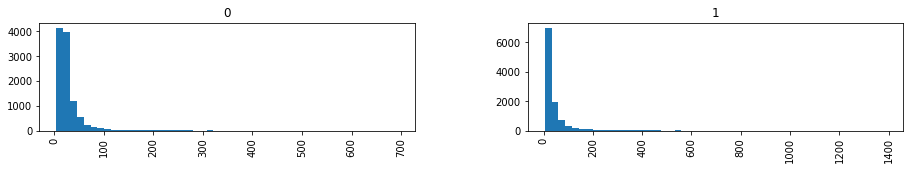

In [6]:
data3.hist(column='review_content_length', by='labeled',bins=50,figsize=(15,2))

In [7]:
data3.head(1)

,RATING,VERIFIED_PURCHASE,labeled,REVIEW_TEXT,Processed_Review_text,review_content_length,polarity,sentiment,subjectivity,subjective_sentiment
0,5,0,0,I Purchased This Product For My Two Kids For M...,purchased product two kids son daughter fits d...,60,0.75,Positive,0.434091,Objective


In [8]:
def sentimented(x):
    if x== 'Negative':
        return -1
    elif x == 'Neutral':
        return 0
    elif x == 'Positive':
        return 1

def subjective_sentiment(x):
    if x =='Subjective':
        return 1
    elif x =='Objective':
        return 0

In [9]:
data3['sentiment'] = data3['sentiment'].apply(sentimented)
data3['subjective_sentiment'] = data3['subjective_sentiment'].apply(subjective_sentiment)

In [10]:
data3.head(1)

,RATING,VERIFIED_PURCHASE,labeled,REVIEW_TEXT,Processed_Review_text,review_content_length,polarity,sentiment,subjectivity,subjective_sentiment
0,5,0,0,I Purchased This Product For My Two Kids For M...,purchased product two kids son daughter fits d...,60,0.75,1,0.434091,0


### Bag of words

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
def vectorizetfidf(df):
    tfidf_vectorizer = TfidfVectorizer().fit(df)
    review_tfidf = tfidf_vectorizer.transform(df)
    return review_tfidf

In [13]:
X_p = vectorizetfidf(data3['Processed_Review_text'])

In [14]:
y = data3['labeled']

In [15]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [16]:
def split_data(Xt,yt):
    X_train, X_test, y_train, y_test = train_test_split(Xt, yt,random_state = 42, test_size = 0.25)
    return X_train, X_test, y_train, y_test

In [17]:
X_train_p, X_test_p, y_train_p, y_test_p = split_data(X_p, y)

In [18]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [19]:
from sklearn.naive_bayes import BernoulliNB
def BernoulliNB_classifier(Xt, yt, testx, testy):
    print("----BernouliNB----\n")
    clf_nb = BernoulliNB(alpha=0.1)
    clf_nb.fit(Xt, yt)
    pred_bernoulliNB = clf_nb.predict(Xt)
    print('------BernouliNB Train-------')
    print('precision: {}'.format(round(precision_score(yt, pred_bernoulliNB)*100, 3)))
    print('recall: {}'.format(round(recall_score(yt, pred_bernoulliNB)*100,3)))
    print('fscore: {}'.format(round(f1_score(yt, pred_bernoulliNB)*100,3)))
    print('Accuracy Score: {}'.format(round(accuracy_score(yt, pred_bernoulliNB)*100,3)))
    print('------BernouliNB Test-------')
    clf_nb.fit(testx, testy)
    test_bernoulliNB = clf_nb.predict(testx)
    print('precision: {}'.format(round(precision_score(testy, test_bernoulliNB)*100,3)))
    print('recall: {}'.format(round(recall_score(testy, test_bernoulliNB)*100,3)))
    print('fscore: {}'.format(round(f1_score(testy, test_bernoulliNB)*100,3)))
    print('Accuracy Score: {}'.format(round(accuracy_score(testy, test_bernoulliNB)*100,3)))

In [20]:
from sklearn.linear_model import LogisticRegression
def LogisticRegression_classifier(Xt, yt, testx, testy):
    print("----Logistic Regression----\n")
    clf_lr = LogisticRegression()
    clf_lr.fit(Xt, yt)
    pred_logistic = clf_lr.predict(Xt)
    print('------LR Train-------')
    print('precision: {}'.format(round(precision_score(yt, pred_logistic)*100, 3)))
    print('recall: {}'.format(round(recall_score(yt, pred_logistic)*100,3)))
    print('fscore: {}'.format(round(f1_score(yt, pred_logistic)*100,3)))
    print('Accuracy Score: {}'.format(round(accuracy_score(yt, pred_logistic)*100,3)))
    print('------LR Test-------')
    clf_lr.fit(testx, testy)
    test_logistic = clf_lr.predict(testx)
    print('precision: {}'.format(round(precision_score(testy, test_logistic)*100,3)))
    print('recall: {}'.format(round(recall_score(testy, test_logistic)*100,3)))
    print('fscore: {}'.format(round(f1_score(testy, test_logistic)*100,3)))
    print('Accuracy Score: {}'.format(round(accuracy_score(testy, test_logistic)*100,3)))

In [21]:
from sklearn import svm
def SVM_classifier(Xt, yt, testx, testy):
    print("----SVM----\n")
    clf_svm = svm.LinearSVC(C=2)
    clf_svm.fit(Xt, yt)
    pred_SVM = clf_svm.predict(Xt)
    print('------SVM Train-------')
    print('precision: {}'.format(round(precision_score(yt, pred_SVM)*100, 3)))
    print('recall: {}'.format(round(recall_score(yt, pred_SVM)*100,3)))
    print('fscore: {}'.format(round(f1_score(yt, pred_SVM)*100,3)))
    print('Accuracy Score: {}'.format(round(accuracy_score(yt, pred_SVM)*100,3)))
    print('------SVM Test-------')
    clf_svm.fit(testx, testy)
    test_SVM = clf_svm.predict(testx)
    print('precision: {}'.format(round(precision_score(testy, test_SVM)*100,3)))
    print('recall: {}'.format(round(recall_score(testy, test_SVM)*100,3)))
    print('fscore: {}'.format(round(f1_score(testy, test_SVM)*100,3)))
    print('Accuracy Score: {}'.format(round(accuracy_score(testy, test_SVM)*100,3)))

In [22]:
from xgboost import XGBClassifier
def XGB_classifier(Xt, yt, testx, testy):
    print("----XGB----\n")
    clf_xgb = XGBClassifier()
    clf_xgb.fit(Xt, yt)
    pred_XGB = clf_xgb.predict(Xt)
    print('------XGB Train-------')
    print('precision: {}'.format(round(precision_score(yt, pred_XGB)*100, 3)))
    print('recall: {}'.format(round(recall_score(yt, pred_XGB)*100,3)))
    print('fscore: {}'.format(round(f1_score(yt, pred_XGB)*100,3)))
    print('Accuracy Score: {}'.format(round(accuracy_score(yt, pred_XGB)*100,3)))
    print('------XGB Test-------')
    clf_xgb.fit(testx, testy)
    test_XGB = clf_xgb.predict(testx)
    print('precision: {}'.format(round(precision_score(testy, test_XGB)*100,3)))
    print('recall: {}'.format(round(recall_score(testy, test_XGB)*100,3)))
    print('fscore: {}'.format(round(f1_score(testy, test_XGB)*100,3)))
    print('Accuracy Score: {}'.format(round(accuracy_score(testy, test_XGB)*100,3)))

In [23]:
from sklearn.ensemble import RandomForestClassifier
def RF_classifier(Xt, yt, testx, testy):
    print("----Random Forest----\n")
    clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
    clf_rf.fit(Xt, yt)
    pred_RF = clf_rf.predict(Xt)
    print('------RF Train-------')
    print('precision: {}'.format(round(precision_score(yt, pred_RF)*100, 3)))
    print('recall: {}'.format(round(recall_score(yt, pred_RF)*100,3)))
    print('fscore: {}'.format(round(f1_score(yt, pred_RF)*100,3)))
    print('Accuracy Score: {}'.format(round(accuracy_score(yt, pred_RF)*100,3)))
    print('------RF Test-------')
    clf_rf.fit(testx, testy)
    test_RF = clf_rf.predict(testx)
    print('precision: {}'.format(round(precision_score(testy, test_RF)*100,3)))
    print('recall: {}'.format(round(recall_score(testy, test_RF)*100,3)))
    print('fscore: {}'.format(round(f1_score(testy, test_RF)*100,3)))
    print('Accuracy Score: {}'.format(round(accuracy_score(testy, test_RF)*100,3)))

In [24]:
from sklearn.neural_network import MLPClassifier
def MLP_classifier(Xt, yt, testx, testy):
    print("----MLP----\n")
    clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
    clf_mlp.fit(Xt, yt)
    pred_mlp = clf_mlp.predict(Xt)
    print('------MLP Train-------')
    print('precision: {}'.format(round(precision_score(yt, pred_mlp)*100, 3)))
    print('recall: {}'.format(round(recall_score(yt, pred_mlp)*100,3)))
    print('fscore: {}'.format(round(f1_score(yt, pred_mlp)*100,3)))
    print('Accuracy Score: {}'.format(round(accuracy_score(yt, pred_mlp)*100,3)))
    print('------MLP Test-------')
    clf_mlp.fit(testx, testy)
    test_mlp = clf_mlp.predict(testx)
    print('precision: {}'.format(round(precision_score(testy, test_mlp)*100,3)))
    print('recall: {}'.format(round(recall_score(testy, test_mlp)*100,3)))
    print('fscore: {}'.format(round(f1_score(testy, test_mlp)*100,3)))
    print('Accuracy Score: {}'.format(round(accuracy_score(testy, test_mlp)*100,3)))

In [28]:
from sklearn.ensemble import AdaBoostClassifier
def ADA_classifier(Xt, yt, testx, testy):
    print("----ADA----\n")
    clf_ada = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf_ada.fit(Xt, yt)
    pred_ada = clf_ada.predict(Xt)
    print('------ADA Train-------')
    print('precision: {}'.format(round(precision_score(yt, pred_ada)*100, 3)))
    print('recall: {}'.format(round(recall_score(yt, pred_ada)*100,3)))
    print('fscore: {}'.format(round(f1_score(yt, pred_ada)*100,3)))
    print('Accuracy Score: {}'.format(round(accuracy_score(yt, pred_ada)*100,3)))
    print('------ADA Test-------')
    clf_ada.fit(testx, testy)
    test_ada = clf_ada.predict(testx)
    print('precision: {}'.format(round(precision_score(testy, test_ada)*100,3)))
    print('recall: {}'.format(round(recall_score(testy, test_ada)*100,3)))
    print('fscore: {}'.format(round(f1_score(testy, test_ada)*100,3)))
    print('Accuracy Score: {}'.format(round(accuracy_score(testy, test_ada)*100,3)))

In [31]:
print("Processed Text(%)")
BernoulliNB_classifier(X_train_p, y_train_p, X_test_p, y_test_p )
LogisticRegression_classifier(X_train_p, y_train_p, X_test_p, y_test_p )
XGB_classifier(X_train_p, y_train_p, X_test_p, y_test_p )
SVM_classifier(X_train_p, y_train_p, X_test_p, y_test_p )
RF_classifier(X_train_p, y_train_p, X_test_p, y_test_p )
MLP_classifier(X_train_p, y_train_p, X_test_p, y_test_p )

Processed Text(%)
----BernouliNB----

------BernouliNB Train-------
precision: 90.281
recall: 54.329
fscore: 67.836
Accuracy Score: 74.273
------BernouliNB Test-------
precision: 98.389
recall: 64.896
fscore: 78.207
Accuracy Score: 81.848
----Logistic Regression----

------LR Train-------
precision: 78.791
recall: 81.004
fscore: 79.882
Accuracy Score: 79.625
------LR Test-------
precision: 84.882
recall: 87.362
fscore: 86.104
Accuracy Score: 85.848
----XGB----

------XGB Train-------
precision: 81.986
recall: 82.289
fscore: 82.137
Accuracy Score: 82.127
------XGB Test-------
precision: 88.996
recall: 91.157
fscore: 90.064
Accuracy Score: 89.905
----SVM----

------SVM Train-------
precision: 94.989
recall: 94.24
fscore: 94.613
Accuracy Score: 94.641
------SVM Test-------
precision: 99.315
recall: 99.051
fscore: 99.183
Accuracy Score: 99.181
----Random Forest----

------RF Train-------
precision: 65.66
recall: 52.537
fscore: 58.37
Accuracy Score: 62.578
------RF Test-------
precision: 58

In [ ]:
clf_nb = BernoulliNB(alpha=0.1).fit(X_train_p, y_train_p)
clf_lr = LogisticRegression().fit(X_train_p, y_train_p)
clf_svm = svm.LinearSVC(C=2).fit(X_train_p, y_train_p)
clf_xgb = XGBClassifier().fit(X_train_p, y_train_p)
clf_rf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_p, y_train_p)
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1).fit(X_train_p, y_train_p)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(15,7))
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], 'k--')

model_nb_proba=clf_nb.predict_proba(X_test_p)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test_p,model_nb_proba)
plt.plot(fpr, tpr, label='BernoulliNB')

model_lr_proba=clf_lr.predict_proba(X_test_p)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test_p,model_lr_proba)
plt.plot(fpr, tpr, label='Logistic Regression')

model_svm_proba=clf_svm._predict_proba_lr(X_test_p)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test_p,model_svm_proba)
plt.plot(fpr, tpr, label='SVM')

model_xgb_proba=clf_xgb.predict_proba(X_test_p)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test_p,model_xgb_proba)
plt.plot(fpr, tpr, label='XGBoost')

model_rf_proba=clf_rf.predict_proba(X_test_p)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test_p,model_rf_proba)
plt.plot(fpr, tpr, label='Random Forest')


plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC Curve',fontsize=15)
plt.legend()

In [ ]:
print("BernouliNB AUC: ", str(round(roc_auc_score(y_test_p, model_nb_proba)*100,3)))
print("Logistic Regression AUC: ", str(round(roc_auc_score(y_test_p, model_lr_proba)*100,3)))
print("SVM AUC: ", str(round(roc_auc_score(y_test_p, model_svm_proba)*100,3)))
print("XGBoost AUC: ", str(round(roc_auc_score(y_test_p, model_xgb_proba)*100,3)))
print("Random Forest AUC: ",str(round(roc_auc_score(y_test_p, model_rf_proba)*100,3)))